############################## PART A ###############################

############################ Question 1: ############################

Confusion Matrix:	Accuracy score:		Q:

[[638  87]
 [ 29  22]]		0.85052			2 

[[718   7]
 [ 51   0]]		0.92526			4 

[[696  29]
 [ 43   8]]		0.90722			8 

[[723   2]
 [ 51   0]]		0.9317			16 

At Q = 16 accuracy is high at: 0.9317 


############################ Question 2: ############################ 

                                       Accuracy
KNN                                     0.92397
KNN on normalized data                  0.92397
Bayes using unimodal Gaussian density   0.88918
Bayes using GMM                         0.93170 

############################## PART B ###############################

############################ Question 1: ############################


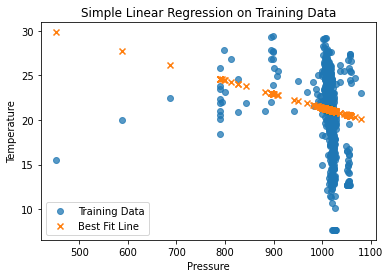


Root Mean Squared Error of Training Data :4.279790433682601

Root Mean Squared Error of Test Data : 4.286985483129509


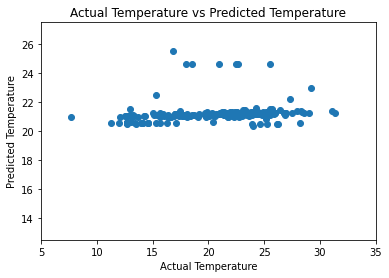


############################ Question 2: ############################


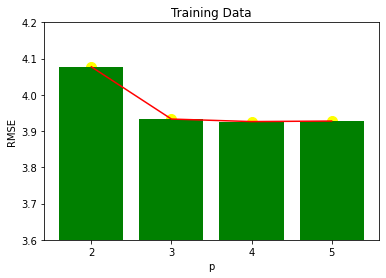

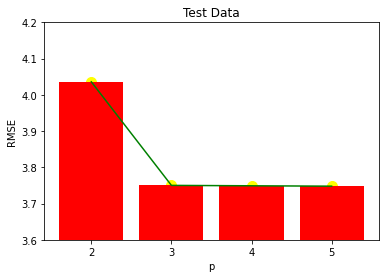

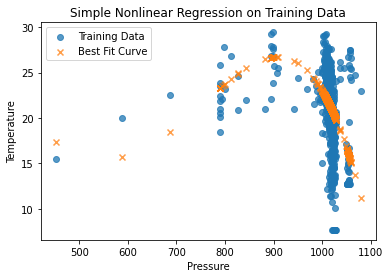

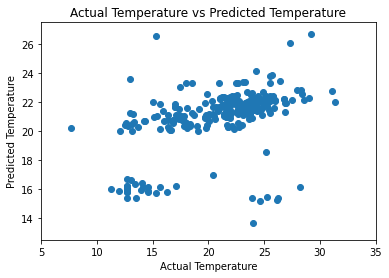

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.mixture  

#PART A
print('#'*30,'PART A','#'*31)

#Question 1
print('\n'+'#'*28,'Question 1:','#'*28)
Train=pd.read_csv('seismic-bumps-train.csv') #Train Data
Test=pd.read_csv('seismic-bumps-test.csv')   #Test Data
Train_0=Train[Train['class']==0]             #Train Data with Class 0
Train_1=Train[Train['class']==1]             #Train Data with Class 1

P_C0=len(Train_0)/len(Train)                 #Prior of Class 0
P_C1=len(Train_1)/len(Train)                 #Prior of Class 1

print('\nConfusion Matrix:\tAccuracy score:\t\tQ:\n')
best_acc=0           #Initializing Best Accuracy 
for Q in [2,4,8,16]: #For loop for different values of Q
    GMM0 = sklearn.mixture.GaussianMixture(n_components=Q, covariance_type='full',random_state=20)  #GMM for Class 0
    GMM0.fit(Train_0[Train_0.columns[:-1]])
    p_x_C0=np.exp(GMM0.score_samples(Test[Test.columns[:-1]])) #Likelihood of x in Class 0
    
    GMM1 = sklearn.mixture.GaussianMixture(n_components=Q, covariance_type='full',random_state=20)  #GMM for Class 1
    GMM1.fit(Train_1[Train_1.columns[:-1]])
    p_x_C1=np.e**GMM1.score_samples(Test[Test.columns[:-1]])  #Likelihood of x in Class 1
    
    P_x=p_x_C0*P_C0+p_x_C1*P_C1 #Evidence
    np.seterr(invalid='ignore') #Ignores warning when P_x --> 0
    
    P_C0_x=p_x_C0*P_C0/P_x #Posterior Probability of Class 0
    P_C1_x=p_x_C1*P_C1/P_x #Posterior Probability of Class 1
    
    Predicted_class=(P_C1_x > P_C0_x)*1 #Array of Predicted Class
    
    print(sklearn.metrics.confusion_matrix(Test[Test.columns[-1]],Predicted_class),end='\t\t')          #Confusion Matrix
    print(round(sklearn.metrics.accuracy_score(Test[Test.columns[-1]],Predicted_class),5),end='\t\t\t') #Accuracy Score
    print(Q,'\n')
    
    if sklearn.metrics.accuracy_score(Test[Test.columns[-1]],Predicted_class) > best_acc:
            best_acc=round(sklearn.metrics.accuracy_score(Test[Test.columns[-1]],Predicted_class),5)    #Best Accuracy
            Q_best=Q          #Best value of Q
print('At Q =',Q_best,'accuracy is high at:',best_acc,'\n')

#Question 2
print('\n'+'#'*28,'Question 2:','#'*28,'\n')
Method=['KNN','KNN on normalized data','Bayes using unimodal Gaussian density','Bayes using GMM']
Accuracy=[0.92397,0.92397,0.88918,best_acc]                 #Accuracy
df=pd.DataFrame(Accuracy,index=Method,columns=['Accuracy']) #Dataframe of Methods and Accuracy
print(df,'\n')

#Part B
print('#'*30,'PART B','#'*31)
df=pd.read_csv('atmosphere_data.csv') #Dataframe
[X_train, X_test] =sklearn.model_selection.train_test_split(df, test_size=0.3, random_state=42,shuffle=True) #Splitting Data
X_train.to_csv('atmosphere_train.csv') #CSV file with Train Data
X_test.to_csv('atmosphere_test.csv')   #CSV file with Test Data

#Question 1
print('\n'+'#'*28,'Question 1:','#'*28)

from sklearn.linear_model import  LinearRegression 
regressor = LinearRegression()
x=X_train['pressure'].values.reshape(-1,1)    #Reshaping
y=X_train['temperature'].values.reshape(-1,1) #Reshaping
regressor.fit(x,y)              #Fitting
y_pred = regressor.predict(x)   #Prediction on Train Data 

#a
plt.scatter(x,y,alpha=0.75,label='Training Data')      #Scatter Plot of Training Data
plt.scatter(x,y_pred,marker='x',label='Best Fit Line')  #Scatter Plot of Predicted Value on Training Data
plt.xlabel('Pressure');plt.ylabel('Temperature')
plt.title('Simple Linear Regression on Training Data')
plt.legend();plt.show()

#b
print('\nRoot Mean Squared Error of Training Data :',end='')
print(((y-y_pred)**2).mean()**0.5)  #RMSE of Training Data

#c
x=X_test['pressure'].values.reshape(-1,1)    #Reshaping
y=X_test['temperature'].values.reshape(-1,1) #Reshaping
y_pred=regressor.predict(x)         #Prediction on Test Data
print('\nRoot Mean Squared Error of Test Data : ',end='')
print(((y-y_pred)**2).mean()**0.5)  #RMSE of Test Data

#d
plt.scatter(y,y_pred) #Scatter Plot of Actual Temp vs Predicted Temp
plt.xlabel('Actual Temperature');plt.ylabel('Predicted Temperature')
plt.title('Actual Temperature vs Predicted Temperature')
plt.xlim(5,35);plt.ylim(12.5,27.5)
plt.show()

#Question 2
print('\n'+'#'*28,'Question 2:','#'*28)
from sklearn.preprocessing import  PolynomialFeatures 

min_RMSE_test=10**10 #Initializing 
RMSE_train=[];RMSE_test=[]  #Initializing to Empty List

x_train=X_train['pressure'].values.reshape(-1,1)    #Reshaping
y_train=X_train['temperature'].values.reshape(-1,1)
x_test=X_test['pressure'].values.reshape(-1,1)
y_test=X_test['temperature'].values.reshape(-1,1)

N=[2,3,4,5]
for p in N: #p is degree of polynomial
    polynomial_features = PolynomialFeatures(degree=p)
    
    #a
    x_poly_train = polynomial_features.fit_transform(x_train)  #Transforming x_train in p dimension
    regressor = LinearRegression()
    regressor.fit(x_poly_train, y_train) #Fitting
    
    y_pred_train = regressor.predict(x_poly_train)             #Prediction on Training Data
    RMSE_train.append(((y_train-y_pred_train)**2).mean()**0.5) #RMSE
   
    #b
    x_poly_test = polynomial_features.fit_transform(x_test)    #Transforming x_test in p dimension
    y_pred_test = regressor.predict(x_poly_test)               #Prediction on Training Data
    RMSE_test.append(((y_test-y_pred_test)**2).mean()**0.5)    #RMSE
    
    if RMSE_test[-1]<=min_RMSE_test:
            y_best_pred_test=y_pred_test     #Best Prediction on Test Data
            y_best_pred_train=y_pred_train   #Best Prediction on Train Data     
        
plt.bar(N,RMSE_train,color='green') #Plot of RMSE of Train Data
plt.scatter(N,RMSE_train,color='yellow',s=100)
plt.plot(N,RMSE_train,color='red')
plt.xlabel('p');plt.ylabel('RMSE')
plt.xticks(N);plt.ylim(3.6,4.2)
plt.title('Training Data');plt.show()

plt.bar(N,RMSE_test,color='red') #Plot of RMSE of Test Data
plt.scatter(N,RMSE_test,color='yellow',s=100)
plt.plot(N,RMSE_test,color='green')
plt.xlabel('p');plt.ylabel('RMSE')
plt.xticks(N);plt.ylim(3.6,4.2)
plt.title('Test Data');plt.show()

#c
plt.scatter(x_train,y_train,alpha=0.75,label='Training Data')                       #Scatter Plot of Train Data
plt.scatter(x_train,y_best_pred_train,marker='x',alpha=0.75,label='Best Fit Curve') #Scatter Plot of Prediction on Train Data
plt.xlabel('Pressure');plt.ylabel('Temperature')
plt.title('Simple Nonlinear Regression on Training Data')
plt.legend();plt.show()

#d
plt.scatter(y_test,y_best_pred_test) #Scatter Plot of Actual Temp vs Predicted Temp
plt.xlabel('Actual Temperature');plt.ylabel('Predicted Temperature')
plt.title('Actual Temperature vs Predicted Temperature')
plt.xlim(5,35);plt.ylim(12.5,27.5)
plt.show()
